In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import MEBF
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate Boolean matrix

[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


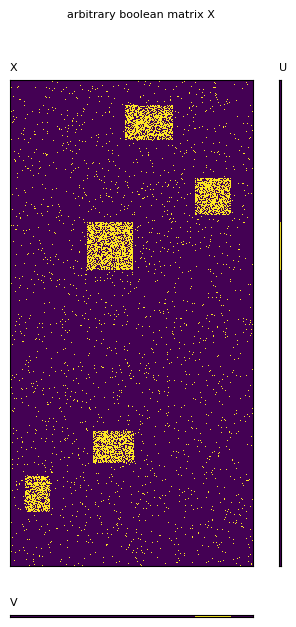

In [6]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

## I. Reconstruction task

In [9]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

X_train

<1000x500 sparse matrix of type '<class 'numpy.intc'>'
	with 28129 stored elements in Compressed Sparse Row format>

### 1. Manually select tau
k and w are not effective here.

[I] Running without k.
[I] k            : None
[I] t            : 0.5
[I] w            : [1, 1]
[W] Missing validation data.
[W] Stopped in advance: Reached requested rank
[W]   requested 500 factor(s), got 500 factor(s).


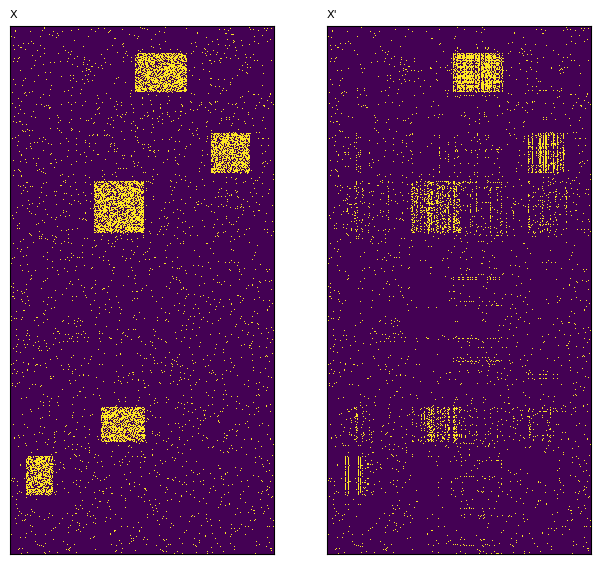

In [31]:
t = 0.5
w = [1, 1] # barely effective

mebf = MEBF(t=t, w=w)
mebf.fit(X_train, verbose=False)

from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(mebf.U, mebf.V.T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings, scaling=0.5)

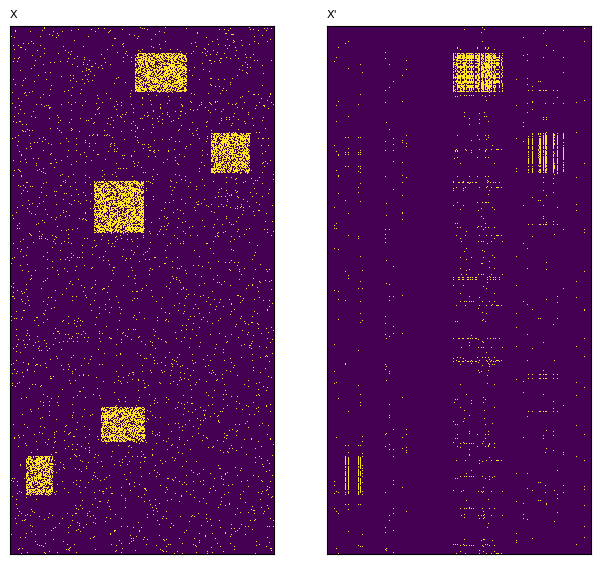

In [32]:
from utils import matmul, to_dense, show_matrix
settings = [(to_dense(X_test), [0, 0], 'X'), 
            (matmul(mebf.U[:, :100], mebf.V[:, :100].T, sparse=False, boolean=True), [0, 1], "X'")]
show_matrix(settings=settings, scaling=0.5)